In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


# Exploratory Data Analysis (EDA)

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random


train_df = pd.read_csv('../input/titanic/train.csv') 
train_df.head()
test_df = pd.read_csv('../input/titanic/test.csv')

data = [train_df, test_df]

   

# Missing Values

In [17]:
print(train_df.isnull().mean())

### 77% of 'Cabin' data is missing!!!! ###

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64


In [18]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Age missing values

In [19]:
data = [train_df, test_df]

# Fill 'Age' missing values, with median values of male/female from each 'Pclass'

age_pclass_sex =  train_df.groupby(['Sex', 'Pclass']).median()['Age']  ### MEDIAN IS LESS SENSITIVE TO OUTLIERS THAN MEAN!!! ###

for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}s: {}'.format(pclass, sex, age_pclass_sex[sex][pclass]))
print('Median age of all passengers: {}'.format(train_df['Age'].median()))

for dataset in data:
    dataset['Age'] = dataset.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

#print(test_df.isnull().mean())


Median age of Pclass 1 females: 35.0
Median age of Pclass 1 males: 40.0
Median age of Pclass 2 females: 28.0
Median age of Pclass 2 males: 30.0
Median age of Pclass 3 females: 21.5
Median age of Pclass 3 males: 25.0
Median age of all passengers: 28.0


# Embarked missing values

In [20]:
print(train_df['Embarked'].value_counts())    
    
# Fill 'Embarked' with most common (S)
    
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')


S    644
C    168
Q     77
Name: Embarked, dtype: int64


# Fare missing values

In [21]:
print(train_df['Fare'].isnull().sum())
print(test_df['Fare'].isnull().sum())

# check on 'Fare' correlations

print()
all_corr = train_df.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
all_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
print(all_corr[all_corr['Feature 1'] == 'Fare'])

print()
fare_pclass = train_df.groupby('Pclass').median()['Fare']
for pclass in range(1, 4):
    print('Median Fare of Pclass {}: {}'.format(pclass, fare_pclass[pclass]))
print('Median Fare of all passengers: {}'.format(train_df['Fare'].median()))


print()
print(train_df['Fare'].describe()) # using median instead of mean again!!
print()
print()
## FILLING FARE MISSING VALUE ON TEST SET ##

for i in range(len(test_df)):
    if np.isnan(test_df.loc[i, 'Fare']):
        print(test_df.loc[i, :])
        
test_df['Fare'] = test_df['Fare'].fillna(fare_pclass[3])

0
1

   Feature 1    Feature 2  Correlation Coefficient
0       Fare         Fare                 1.000000
8       Fare       Pclass                 0.549500
16      Fare     Survived                 0.257307
19      Fare        Parch                 0.216225
24      Fare        SibSp                 0.159651
25      Fare          Age                 0.122692
44      Fare  PassengerId                 0.012658

Median Fare of Pclass 1: 60.287499999999994
Median Fare of Pclass 2: 14.25
Median Fare of Pclass 3: 8.05
Median Fare of all passengers: 14.4542

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


PassengerId                  1044
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60.5
SibSp                           0
Parch                           0
Ticket        

In [22]:
#print(train_df.isnull().sum())
print(test_df.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


# Cabing missing values

In [25]:
import re

data = [train_df, test_df]
for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna('M')
    #print(dataset['Cabin'].value_counts())
    
for dataset in data:
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    print(dataset['Deck'].value_counts())
    

M    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Deck, dtype: int64
M    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: Deck, dtype: int64


M      687
ABC    122
DE      65
FG      17
Name: Deck, dtype: int64
M      327
ABC     60
DE      22
FG       9
Name: Deck, dtype: int64


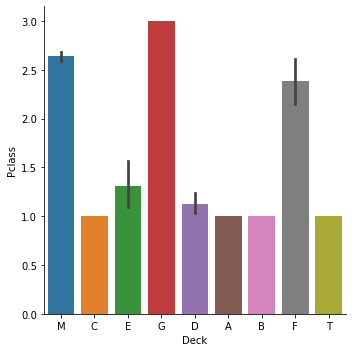

In [26]:
# checking correlations of 'Deck'

sns.catplot(x="Deck", y="Pclass", kind="bar", data=train_df);



for dataset in data:   
    dataset['Deck'] = dataset['Deck'].replace(['A', 'B', 'C', 'T'], 'ABC')
    dataset['Deck'] = dataset['Deck'].replace(['D', 'E'], 'DE')
    dataset['Deck'] = dataset['Deck'].replace(['F', 'G'], 'FG')
    print(dataset['Deck'].value_counts())

In [27]:
print(train_df.isnull().sum())
print(test_df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Deck           0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Deck           0
dtype: int64


In [28]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,M
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,ABC
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,M
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,ABC
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,M


# Grouping feature values - Age and Fare

In [29]:

data = [train_df, test_df]

for dataset in data:

    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[dataset['Age'] > 66, 'Age'] = 7
    dataset['Age'] = dataset['Age'].astype(int)

    dataset.loc[dataset['Fare'] <= 7.75, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.75) & (dataset['Fare'] <= 8.05), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 8.05) & (dataset['Fare'] <= 12.475), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 12.475) & (dataset['Fare'] <= 19.258), 'Fare'] = 3
    dataset.loc[(dataset['Fare'] > 19.258) & (dataset['Fare'] <= 27.9), 'Fare'] = 4
    dataset.loc[(dataset['Fare'] > 27.9) & (dataset['Fare'] <= 56.929), 'Fare'] = 5
    dataset.loc[dataset['Fare'] > 56.929, 'Fare'] = 6
    dataset['Fare'] = dataset['Fare'].astype(int)
    
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,2,1,0,A/5 21171,0,M,S,M
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5,1,0,PC 17599,6,C85,C,ABC
2,3,1,3,"Heikkinen, Miss. Laina",female,3,0,0,STON/O2. 3101282,1,M,S,M
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5,1,0,113803,5,C123,S,ABC
4,5,0,3,"Allen, Mr. William Henry",male,5,0,0,373450,1,M,S,M


   Feature 1    Feature 2  Correlation Coefficient
5        Age          Age                 1.000000
12       Age       Pclass                 0.407437
21       Age        SibSp                 0.264027
23       Age        Parch                 0.188998
26       Age         Fare                 0.147380
33       Age     Survived                 0.049126
36       Age  PassengerId                 0.040331


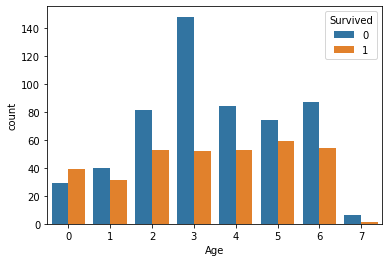

In [30]:
sns.countplot(x='Age', hue='Survived', data= train_df)

all_corr = train_df.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
all_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
print(all_corr[all_corr['Feature 1'] == 'Age'])

# Adding FamilySize feature

In [31]:
data = [train_df, test_df]

familysize = {'Alone': 1, 'Small': 2, 'Medium': 3, 'Large': 4}

for dataset in data:
    dataset['FamilySize'] = dataset['Parch'] + dataset['SibSp'] + 1
    dataset['FamilySize'] = dataset['FamilySize'].replace(1, 'Alone')
    dataset['FamilySize'] = dataset['FamilySize'].replace([2, 3, 4], 'Small')
    dataset['FamilySize'] = dataset['FamilySize'].replace([5, 6], 'Medium')
    dataset['FamilySize'] = dataset['FamilySize'].replace([7, 8, 11], 'Large')
    dataset['FamilySize'] = dataset['FamilySize'].map(familysize)
    
    print(dataset['FamilySize'].value_counts())

1    537
2    292
3     37
4     25
Name: FamilySize, dtype: int64
1    253
2    145
4     10
3     10
Name: FamilySize, dtype: int64


# Title feature

Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: Title, dtype: int64
1    517
2    185
3    126
4     40
5     23
Name: Title, dtype: int64
Mr        240
Miss       79
Mrs        72
Master     21
Rare        6
Name: Title, dtype: int64
1    240
2     79
3     72
4     21
5      6
Name: Title, dtype: int64


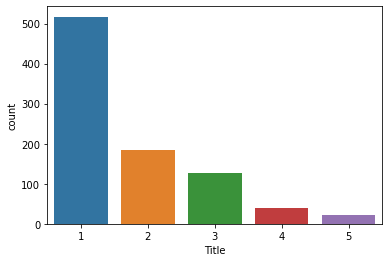

In [32]:
data = [train_df, test_df]

titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    #print(dataset['Title'].value_counts())
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    print(dataset['Title'].value_counts())
    
    dataset['Title'] = dataset['Title'].map(titles)
    print(dataset['Title'].value_counts())
    
sns.countplot(x='Title', data= train_df)

# Label-encoding

In [33]:
data = [train_df, test_df]

train_df = train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)
test_df = test_df.drop(['Name', 'Ticket', 'Cabin'], axis = 1)

train_df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,FamilySize,Title
0,0,3,male,2,1,0,0,S,M,2,1
1,1,1,female,5,1,0,6,C,ABC,2,3
2,1,3,female,3,0,0,1,S,M,1,2
3,1,1,female,5,1,0,5,S,ABC,2,3
4,0,3,male,5,0,0,1,S,M,1,1


In [34]:

data = [train_df, test_df]

gender = {'male': 0, 'female': 1}
ports = {'S': 0, 'C': 1, 'Q': 2}
decks = {'ABC': 1, 'DE': 2, 'FG': 3, 'M': 4}

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(gender)
    dataset['Embarked'] = dataset['Embarked'].map(ports)
    dataset['Deck'] = dataset['Deck'].map(decks)
    # Title is already encoded
    # Age is already encoded


    


In [37]:
train_df.head()
#test_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,FamilySize,Title
0,0,3,0,2,1,0,0,0,4,2,1
1,1,1,1,5,1,0,6,1,1,2,3
2,1,3,1,3,0,0,1,0,4,1,2
3,1,1,1,5,1,0,5,0,1,2,3
4,0,3,0,5,0,0,1,0,4,1,1


(891, 10)
(891,)
(712,) (179,)


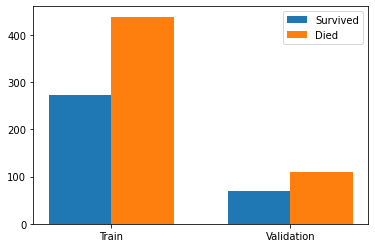

In [38]:
from sklearn.model_selection import train_test_split

x = train_df.iloc[:, 1:]
y = train_df.iloc[:, 0]


print(x.shape)
print(y.shape)

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2, random_state = 0)

print(y_train.shape, y_val.shape)

bars = ['Train', 'Validation']
survived = [y_train.sum(), y_val.sum()]
died = [len(y_train) - y_train.sum(), len(y_val) - y_val.sum()]

x = np.arange(len(bars))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, survived, width, label='Survived')
rects2 = ax.bar(x + width/2, died, width, label='Died')

# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_ylabel('Scores')
#ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(bars)
ax.legend()





plt.show()

Hidden Layers: 1, Hidden Neurons: 4, Batch-size: 8

MLP(
  (fc1): Linear(in_features=10, out_features=4, bias=True)
  (fc2): Linear(in_features=4, out_features=4, bias=True)
  (output): Linear(in_features=4, out_features=1, bias=True)
  (relu): ReLU(inplace=True)
  (sigmoid): Sigmoid()
)
712
Epoch 0/299
----------
....train loss: 0.685
....train acc: 0.617
....train f-score: 0.000
....train auc: 0.485
....val loss: 0.685
....val acc: 0.598
....val f-score: 0.000
....val auc: 0.542
Epoch 299/299
----------
....train loss: 0.644
....train acc: 0.617
....train f-score: 0.000
....train auc: 0.781
....val loss: 0.638
....val acc: 0.598
....val f-score: 0.000
....val auc: 0.847
Best model weights achieved on epoch 299


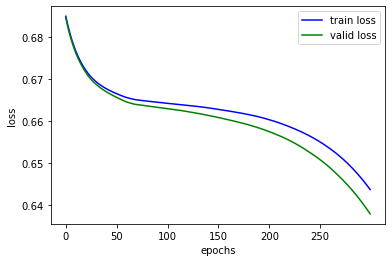

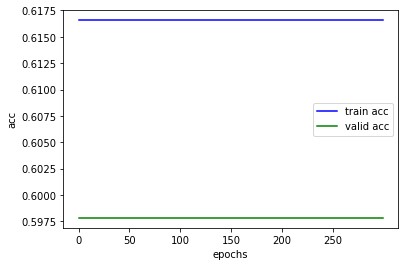

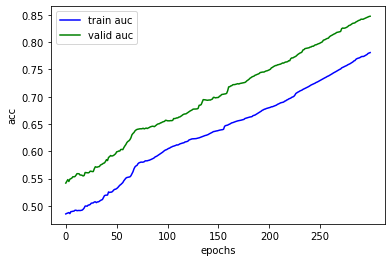

Hidden Layers: 2, Hidden Neurons: 4, Batch-size: 8

MLP(
  (fc1): Linear(in_features=10, out_features=4, bias=True)
  (fc2): Linear(in_features=4, out_features=4, bias=True)
  (fc3): Linear(in_features=4, out_features=4, bias=True)
  (output): Linear(in_features=4, out_features=1, bias=True)
  (relu): ReLU(inplace=True)
  (sigmoid): Sigmoid()
)
712
Epoch 0/299
----------
....train loss: 0.670
....train acc: 0.617
....train f-score: 0.000
....train auc: 0.414
....val loss: 0.668
....val acc: 0.598
....val f-score: 0.000
....val auc: 0.498
Epoch 299/299
----------
....train loss: 0.495
....train acc: 0.812
....train f-score: 0.731
....train auc: 0.850
....val loss: 0.489
....val acc: 0.750
....val f-score: 0.687
....val auc: 0.851
Best model weights achieved on epoch 264


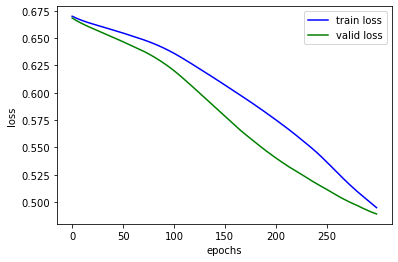

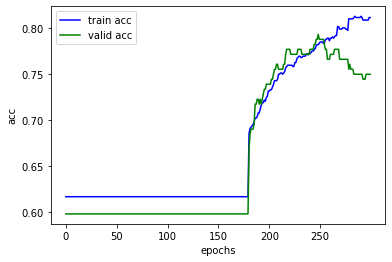

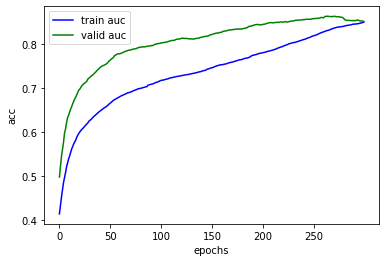

Hidden Layers: 4, Hidden Neurons: 4, Batch-size: 8

MLP(
  (fc1): Linear(in_features=10, out_features=4, bias=True)
  (fc2): Linear(in_features=4, out_features=4, bias=True)
  (output): Linear(in_features=4, out_features=1, bias=True)
  (relu): ReLU(inplace=True)
  (sigmoid): Sigmoid()
)
712
Epoch 0/299
----------
....train loss: 0.702
....train acc: 0.454
....train f-score: 0.085
....train auc: 0.292
....val loss: 0.705
....val acc: 0.424
....val f-score: 0.019
....val auc: 0.258
Epoch 299/299
----------
....train loss: 0.434
....train acc: 0.830
....train f-score: 0.775
....train auc: 0.860
....val loss: 0.470
....val acc: 0.772
....val f-score: 0.745
....val auc: 0.836
Best model weights achieved on epoch 123


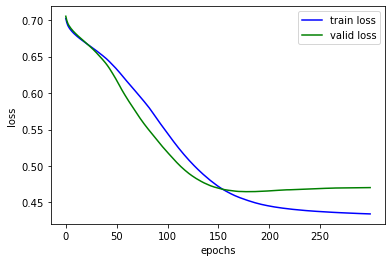

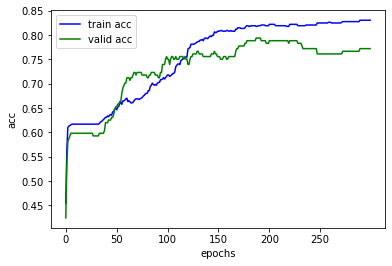

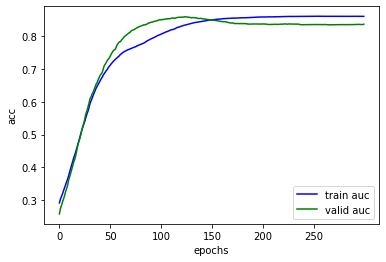

Hidden Layers: 8, Hidden Neurons: 4, Batch-size: 8

MLP(
  (fc1): Linear(in_features=10, out_features=4, bias=True)
  (fc2): Linear(in_features=4, out_features=4, bias=True)
  (output): Linear(in_features=4, out_features=1, bias=True)
  (relu): ReLU(inplace=True)
  (sigmoid): Sigmoid()
)
712
Epoch 0/299
----------
....train loss: 0.666
....train acc: 0.628
....train f-score: 0.148
....train auc: 0.650
....val loss: 0.658
....val acc: 0.647
....val f-score: 0.268
....val auc: 0.695
Epoch 299/299
----------
....train loss: 0.452
....train acc: 0.837
....train f-score: 0.779
....train auc: 0.861
....val loss: 0.462
....val acc: 0.766
....val f-score: 0.732
....val auc: 0.838
Best model weights achieved on epoch 143


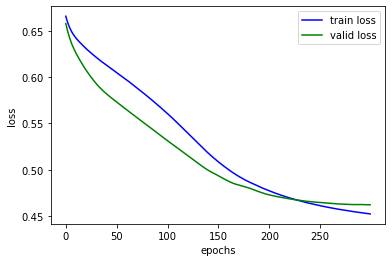

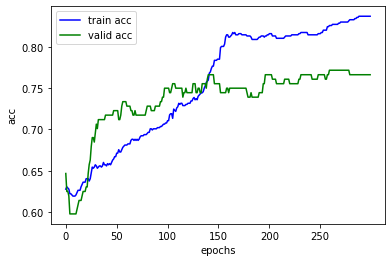

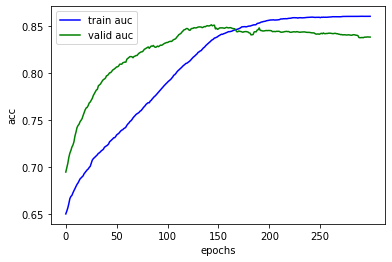

In [43]:
import torch
import torch.nn as nn
from torch import Tensor
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import Dataset, DataLoader
import copy

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

class MLP(nn.Module):  
    
    def __init__(self, features_in, hidden_neurons, hidden_layers):
        super(MLP, self).__init__()
        
        self.features_in = features_in
        self.hidden_neurons = hidden_neurons
        self.hidden_layers = hidden_layers
        self.output_neurons = 1
        
        self.fc1 = nn.Linear(self.features_in, self.hidden_neurons, True)
        self.fc2 = nn.Linear(self.hidden_neurons, self.hidden_neurons, True)
        
        if self.hidden_layers == 2:
            self.fc3 = nn.Linear(self.hidden_neurons, self.hidden_neurons, True)
        
        self.output = nn.Linear(self.hidden_neurons, self.output_neurons,  True)
        
        self.relu = nn.ReLU(inplace=True)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        

        
        batch_size = x.size(0)
        x = x.view(batch_size, self.features_in)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        if self.hidden_layers == 2:
            x = self.relu(self.fc3(x))
        
        x = self.sigmoid(self.output(x))

        return x
    
    

class dataset():
    def __init__(self, x, y):
        self.x = x
        self.y = y.squeeze()
        
        
        self.x = np.asarray(self.x)
        self.y = np.asarray(self.y)
        
    def __getitem__(self, index):
        
        
        return torch.from_numpy(np.asarray(self.x[index])), torch.from_numpy(np.asarray(self.y[index]))
        
    def __len__(self):
        return len(self.x)
    
    
def train_model(model, criterion, optimizer, num_epochs, batch_size):
    
    train_loss = []
    valid_loss = []
    
    train_acc = []
    valid_acc = []
    
    train_fs = []
    valid_fs = []
    
    train_auc = []
    valid_auc = []
    
    best_acc = 0.
    best_auc = 0.
    
    for epoch in range(num_epochs):
        
        if epoch == 0 or epoch == num_epochs - 1:     
            print('Epoch {}/{}'.format(epoch, num_epochs - 1))
            print('-' * 10)

        model.train()
            
        for i, (inputs, labels) in enumerate(trainloader):
                              
            with torch.set_grad_enabled(True):
                
                outputs = model(inputs.float())             
                loss = criterion(outputs.squeeze(), labels.squeeze().float())
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
        model.eval()
        with torch.no_grad():
            
            t_loss = 0.
            corrects = 0
            train_all_true = np.array([])
            train_all_out = np.array([])
            
            for i, (inputs, labels) in enumerate(trainloader):
                
                outputs = model(inputs.float())
                t_loss += criterion(outputs.squeeze(), labels.squeeze().float())
       
                pred = np.copy(outputs)
                
                labels = labels.numpy()
                    
                pred[outputs < 0.5] = 0
                pred[outputs >= 0.5] = 1
                
                
                for j in range(len(pred)):
                    if pred[j] == labels[j]:
                        corrects += 1
                   
                train_true = np.copy(labels)
                train_prob = np.copy(outputs)


                if len(train_all_true) == 0:
                    train_all_true = train_true
                else: 
                    train_all_true = np.concatenate((train_all_true, train_true), axis = 0)
                if len(train_all_out) == 0:
                    train_all_out = train_prob
                else:
                    train_all_out = np.concatenate((train_all_out, train_prob), axis = 0)
            
            train_all_pred = np.copy(train_all_out)
            train_all_pred[train_all_out < 0.5] = 0
            train_all_pred[train_all_out >= 0.5] = 1
            
            train_tn, train_fp, train_fn, train_tp = confusion_matrix(train_all_true, train_all_pred).ravel()
            
            epsilon = 1e-5
            train_prec = train_tp / (train_tp + train_fp + epsilon)
            train_rec = train_tp / (train_tp + train_fn + epsilon)
            t_fs = (2*train_prec*train_rec)/(train_prec + train_rec + epsilon)
                
                
            t_loss /= (i + 1)
            train_loss.append(t_loss.item())
            t_acc = corrects / ((i + 1)*batch_size)
            train_acc.append(t_acc)
            train_fs.append(t_fs)
            train_auc.append(roc_auc_score(train_all_true, train_all_out))
            
            if epoch == 0 or epoch == num_epochs - 1:
                print('....train loss: {:.3f}'.format(t_loss.item()))
                print('....train acc: {:.3f}'.format(t_acc))
                print('....train f-score: {:.3f}'.format(t_fs))
                print('....train auc: {:.3f}'.format(roc_auc_score(train_all_true, train_all_out)))

            #if validloader is None:
            #    continue
                
            v_loss = 0.
            corrects = 0
            val_all_true = np.array([])
            val_all_out = np.array([])
            

            for i, (inputs, labels) in enumerate(validloader):
                
                outputs = model(inputs.float())
                v_loss += criterion(outputs.squeeze(), labels.squeeze().float())
                
                val_pred = np.copy(outputs) 
                
                val_pred[outputs < 0.5] = 0
                val_pred[outputs >= 0.5] = 1
                
                labels = labels.numpy()
                
                for j in range(len(val_pred)):
                    if val_pred[j] == labels[j]:
                        corrects += 1
        
            
                val_true = np.copy(labels)
                val_prob = np.copy(outputs)


                if len(val_all_true) == 0:
                    val_all_true = val_true
                else: 
                    val_all_true = np.concatenate((val_all_true, val_true), axis = 0)
                if len(val_all_out) == 0:
                    val_all_out = val_prob
                else:
                    val_all_out = np.concatenate((val_all_out, val_prob), axis = 0)
            
            val_all_pred = np.copy(val_all_out)
            val_all_pred[val_all_out < 0.5] = 0
            val_all_pred[val_all_out >= 0.5] = 1
            
            val_tn, val_fp, val_fn, val_tp = confusion_matrix(val_all_true, val_all_pred).ravel()
            
            epsilon = 1e-5
            val_prec = val_tp / (val_tp + val_fp + epsilon)
            val_rec = val_tp / (val_tp + val_fn + epsilon)
            val_fs = (2*val_prec*val_rec)/(val_prec + val_rec + epsilon)
            
            v_loss /= (i + 1)
            valid_loss.append(v_loss.item())
            v_acc = corrects / ((i + 1)*batch_size)
            valid_acc.append(v_acc)
            valid_fs.append(val_fs)
            valid_auc.append(roc_auc_score(val_all_true, val_all_out))

            
            if epoch == 0 or epoch == num_epochs - 1:
                print('....val loss: {:.3f}'.format(v_loss.item()))
                print('....val acc: {:.3f}'.format(v_acc))
                print('....val f-score: {:.3f}'.format(val_fs))
                print('....val auc: {:.3f}'.format(roc_auc_score(val_all_true, val_all_out)))
                
            if v_acc >= best_acc:
                best_acc = v_acc
            
            if roc_auc_score(val_all_true, val_all_out) >= best_auc:
                best_auc = roc_auc_score(val_all_true, val_all_out)
                best_model_wts = copy.deepcopy(model.state_dict())
                wts_epoch = epoch

    
    print('Best model weights achieved on epoch {}'.format(wts_epoch))
    model.load_state_dict(best_model_wts)  
    
    return model, train_loss, valid_loss, train_acc, valid_acc, train_fs, valid_fs, train_auc, valid_auc
            
hidden_neurons = [4]
hidden_layers = [1, 2, 4, 8]
batch_sizes = [8]
momentums = [0.9]

for hl in hidden_layers:
    for hn in hidden_neurons:
        for bs in batch_sizes:
            for m in momentums:
            
                print('Hidden Layers: {}, Hidden Neurons: {}, Batch-size: {}\n' .format(hl, hn, bs))

                mlp = MLP(x_train.shape[1], hn, hl)
                print(mlp)

                train_dataset = dataset(x_train, y_train)
                valid_dataset = dataset(x_val, y_val)

                print(len(train_dataset))

                LR = 0.001
                BS = bs
                num_epochs = 300

                trainloader = torch.utils.data.DataLoader(train_dataset, batch_size = BS)
                validloader = torch.utils.data.DataLoader(valid_dataset, batch_size = BS)

                criterion = nn.BCELoss()
                optimizer = torch.optim.SGD(mlp.parameters(), lr = LR)

                model, train_loss, valid_loss, train_acc, valid_acc, train_fs, valid_fs, train_auc, valid_auc = train_model(mlp, criterion, optimizer, num_epochs, BS)

                def plots(num_epochs, train_hist, valid_hist, train_acc, valid_acc, train_auc, valid_auc):
                    plt.figure()
                    plt.plot(range(num_epochs), train_hist, 'b-', label='train loss')
                    plt.plot(range(num_epochs), valid_hist, 'g-', label='valid loss')
                    plt.xlabel('epochs')
                    plt.xticks(np.arange(0, num_epochs, step=50))
                    plt.ylabel('loss')
                    plt.legend()
                    plt.show()

                    plt.figure()
                    plt.plot(range(num_epochs), train_acc, 'b-', label='train acc')
                    plt.plot(range(num_epochs), valid_acc, 'g-', label='valid acc')
                    plt.xlabel('epochs')
                    plt.xticks(np.arange(0, num_epochs, step=50))
                    plt.ylabel('acc')
                    plt.legend()
                    plt.show()

                    plt.figure()
                    plt.plot(range(num_epochs), train_auc, 'b-', label='train auc')
                    plt.plot(range(num_epochs), valid_auc, 'g-', label='valid auc')
                    plt.xlabel('epochs')
                    plt.xticks(np.arange(0, num_epochs, step=50))
                    plt.ylabel('acc')
                    plt.legend()
                    plt.show()



                plots(num_epochs, train_loss, valid_loss, train_acc, valid_acc, train_auc, valid_auc)

In [44]:
class dataset():
    def __init__(self, x):
        self.x = x     
        
        self.x = np.asarray(self.x)
        
    def __getitem__(self, index):
        
        
        return torch.from_numpy(np.asarray(self.x[index]))
        
    def __len__(self):
        return len(self.x)

    
x = test_df.iloc[:, 1:]
print(x.shape)    
test_dataset = dataset(x)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size = BS)

test_out = np.array([])

with torch.no_grad():  # now we are doing inference only, so we do not need gradient
    model.eval()
    for inputs in test_dataloader:
        #inputs = inputs.to(DEVICE, dtype = torch.float)  # copy the mini-batch to GPU

        outputs = model(inputs.float())
        out = outputs.numpy()

        final = np.copy(out)
        final[out < 0.5] = 0
        final[out >= 0.5] = 1

        if len(test_out) == 0:
            test_out = final
        else:
            test_out = np.concatenate((test_out, final), axis = 0)
            
            

print(test_out.shape)

(418, 10)
(418, 1)


In [45]:
submission = pd.DataFrame({'PassengerId': list(test_df['PassengerId']), 'Survived': np.asarray(test_out.squeeze().astype(int))})
submission.to_csv('submission.csv', index=False)
print(submission)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]
